In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import pandas as pd

# Decision Tree 

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
#Acquire Data 
df = acquire.get_titanic_data()
df.head(3)

Using cached csv


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [3]:
#Prepare Data
titanic_df = prepare.prep_titanic_data(df)

In [4]:
train, validate, test = titanic_df

In [5]:
train.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,9.0,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,7.0,4,1,39.6875,Southampton,0,1,0,1


In [6]:
cols_to_drop = ['sex', 'embark_town']
train = train.drop(columns=cols_to_drop)

In [7]:

cols_to_drop = ['sex', 'embark_town']
validate = validate.drop(columns=cols_to_drop)

In [8]:
cols_to_drop = ['sex', 'embark_town']
test = test.drop(columns=cols_to_drop)

In [9]:
#Approximately 61 percent of people did not survive on the Titanic
#This will be my baseline mode
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [10]:
X_train = train.drop(columns=['survived'])
y_train = train.survived 

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [11]:
#Train Model: Create the Object 
#Create the decision tree object with desired hyper-parameters 
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [12]:
#Fit the Model 
#Fit the random forest algorithm to the traning data 
clf = clf.fit(X_train, y_train)

[Text(418.5, 428.08500000000004, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(209.25, 305.775, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(104.625, 183.46500000000003, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(52.3125, 61.15499999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(156.9375, 61.15499999999997, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(313.875, 183.46500000000003, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(261.5625, 61.15499999999997, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(366.1875, 61.15499999999997, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = 0'),
 Text(627.75, 305.775, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(523.125, 183.46500000000003, 'age <= 7.835\ngini = 0.184\nsamples = 205\nvalue = [184, 21]\

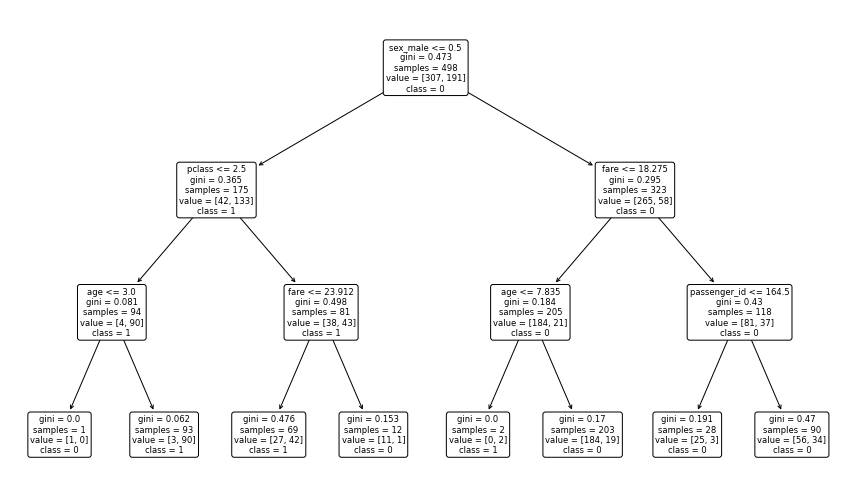

In [13]:
#Visualize a Decision Tree 
plt.figure(figsize=(15, 9))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [14]:
#make a prediction on train observations 
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [15]:
#estimate the probability 
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.62222222, 0.37777778],
       [0.62222222, 0.37777778],
       [0.89285714, 0.10714286],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [16]:
#model score 
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [17]:
#confusion matrix
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [18]:
#confusion matrix value counts?
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [19]:
#confusion matrix more easily read? 
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,277,30
1,57,134


In [20]:
#classification report
#0 are the people who passed away 
#1 are the people who survived 
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [22]:
#Validate Score 
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.80


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Metrics: 
- Accuracy: 0.80
- True Positive Rate: 277/498
- False positive Rate: 30/498
- True negative Rate: 134/498
- False negative Rate: 57/498
- Precision: {0: 0.83, 1:0.82}
- Recall {0:0.90, 1:0.70}
- F1 Score {0: 0.86, 1:0.75}
- support {0: 307, 1: 191}

# Lather Rinse Repeat

Using the titanic dataset again, we will change the max depth to compare results

In [173]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [174]:
clf = clf.fit(X_train, y_train)

[Text(350.8014705882353, 448.47, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(153.86029411764704, 366.93, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(49.23529411764706, 285.39, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(24.61764705882353, 203.84999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(73.85294117647058, 203.84999999999997, 'passenger_id <= 205.0\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(49.23529411764706, 122.31, 'passenger_id <= 197.0\ngini = 0.305\nsamples = 16\nvalue = [3, 13]\nclass = 1'),
 Text(24.61764705882353, 40.76999999999998, 'gini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = 1'),
 Text(73.85294117647058, 40.76999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(98.47058823529412, 122.31, 'gini = 0.0\nsamples = 77\nvalue = [0, 77]\nclass = 1'),
 Text(258.4852941176471, 285.39, 'fare

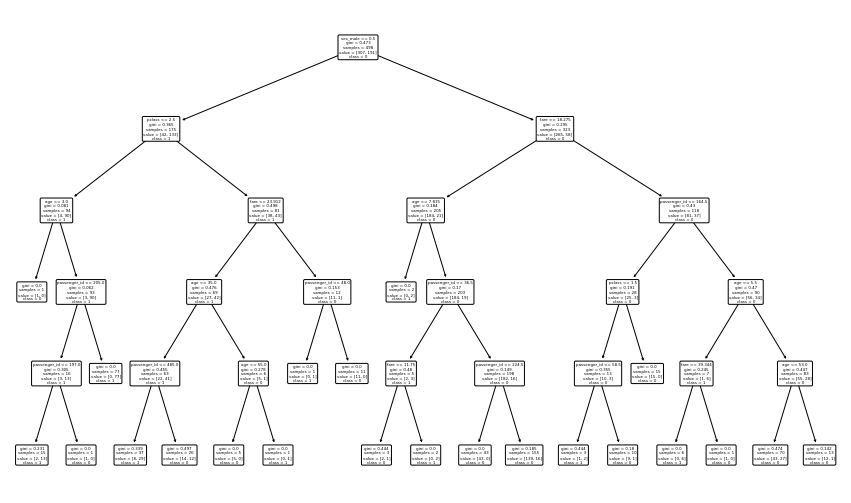

In [175]:
plt.figure(figsize=(15, 9))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [176]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [177]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.61428571, 0.38571429],
       [0.61428571, 0.38571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [178]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [179]:
confusion_matrix(y_train, y_pred)

array([[296,  11],
       [ 58, 133]])

In [180]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [181]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,296,11
1,58,133


In [182]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       307
           1       0.92      0.70      0.79       191

    accuracy                           0.86       498
   macro avg       0.88      0.83      0.84       498
weighted avg       0.87      0.86      0.86       498



In [183]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.77


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Metrics: 
- Accuracy: 0.77
- True Positive Rate: 296/498 
- False Positive Rate: 11/498
- True Negative Rate: 133/498
- False Negative Rate: 58/498 
- Precision: {0: 0.84, 1: 0.92} 
- Recall {0: 0.96, 1: 0.70} 
- f1-score {0: 0.90, 1: 0.79} 
- support {0: 307, 1: 191}

Which Model performs better on your in-sample data?

The model with the higher depth, max_depth 5, performed better on the training data having an overall accuracy of 0.86.

Which model performs best on your out-of-sample data, the validate set?

The model with the lower depth, max_depth 3, performed better on the out-of-sample data having an overall accuracy of 0.80

# Telco Data

In [33]:
tc = acquire.get_telco_data()
tc.head(3)

Using cached csv


,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [34]:
telco_df = prepare.prep_telco_data(tc)

In [35]:
train, validate, test = telco_df

In [36]:
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0


In [37]:
#Gender encoded is a 1 for female
train.gender_encoded.head(3)

5919    1
1915    0
5054    1
Name: gender_encoded, dtype: int64

In [38]:
cols_to_drop = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'device_protection'] 
train = train.drop(columns=cols_to_drop)

In [39]:
cols_to_drop = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'device_protection'] 
validate = validate.drop(columns=cols_to_drop)

In [40]:
cols_to_drop = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'device_protection'] 
test = test.drop(columns=cols_to_drop)

In [41]:
train.head(3)

,senior_citizen,tenure,online_backup,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,Yes,Yes,No,No,Yes,71.10,4299.20,No,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,Yes,No,No,No,Yes,85.45,6028.95,No,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,...,0,1,0,0,0,0,1,0,1,0


In [42]:
cols_to_drop = ['online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'contract_type', 'payment_type'] 
train = train.drop(columns=cols_to_drop)

In [43]:
cols_to_drop = ['online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'contract_type', 'payment_type'] 
validate = validate.drop(columns=cols_to_drop)

In [44]:
cols_to_drop = ['online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'contract_type', 'payment_type'] 
test = test.drop(columns=cols_to_drop)

In [45]:
train.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0


In [46]:
# 73% customers stayed 
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [47]:
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

[Text(558.0, 570.7800000000001, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(279.0, 407.70000000000005, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(139.5, 244.62, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = 0'),
 Text(69.75, 81.53999999999996, 'gini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = 0'),
 Text(209.25, 81.53999999999996, 'gini = 0.302\nsamples = 448\nvalue = [365, 83]\nclass = 0'),
 Text(418.5, 244.62, 'total_charges <= 124.475\ngini = 0.414\nsamples = 567\nvalue = [166, 401]\nclass = 1'),
 Text(348.75, 81.53999999999996, 'gini = 0.203\nsamples = 131\nvalue = [15, 116]\nclass = 1'),
 Text(488.25, 81.53999999999996, 'gini = 0.453\nsamples = 436\nvalue = [151, 285]\nclass = 1'),
 Text(837.0, 407.70000000000005, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.267\nsamples = 2566\nvalue = [2158, 408]\nclass = 0'),
 Text(697.5, 244.6

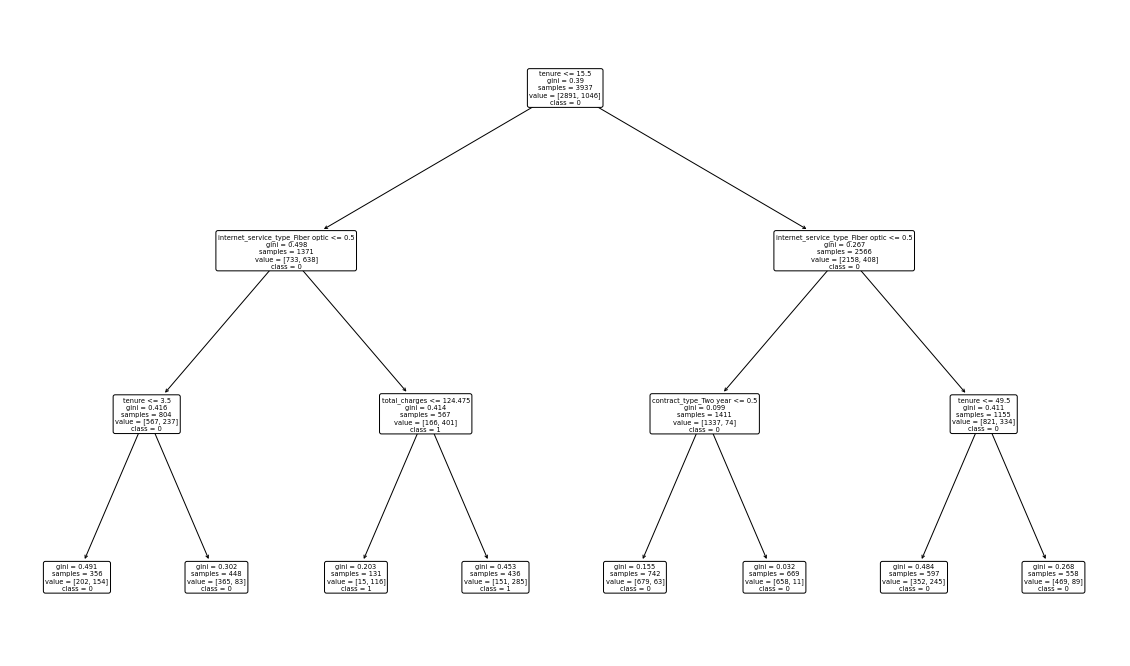

In [48]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [49]:
y_pred = clf.predict(X_train)
y_pred[0:5]
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [50]:
confusion_matrix(y_train, y_pred)

array([[2725,  166],
       [ 645,  401]])

In [51]:
y_train.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [52]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2725,166
1,645,401


In [53]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.38      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



# Lather, Rinse, Repeat

[Text(558.0, 543.6, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(279.0, 326.16, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(139.5, 108.72000000000003, 'gini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = 0'),
 Text(418.5, 108.72000000000003, 'gini = 0.414\nsamples = 567\nvalue = [166, 401]\nclass = 1'),
 Text(837.0, 326.16, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.267\nsamples = 2566\nvalue = [2158, 408]\nclass = 0'),
 Text(697.5, 108.72000000000003, 'gini = 0.099\nsamples = 1411\nvalue = [1337, 74]\nclass = 0'),
 Text(976.5, 108.72000000000003, 'gini = 0.411\nsamples = 1155\nvalue = [821, 334]\nclass = 0')]

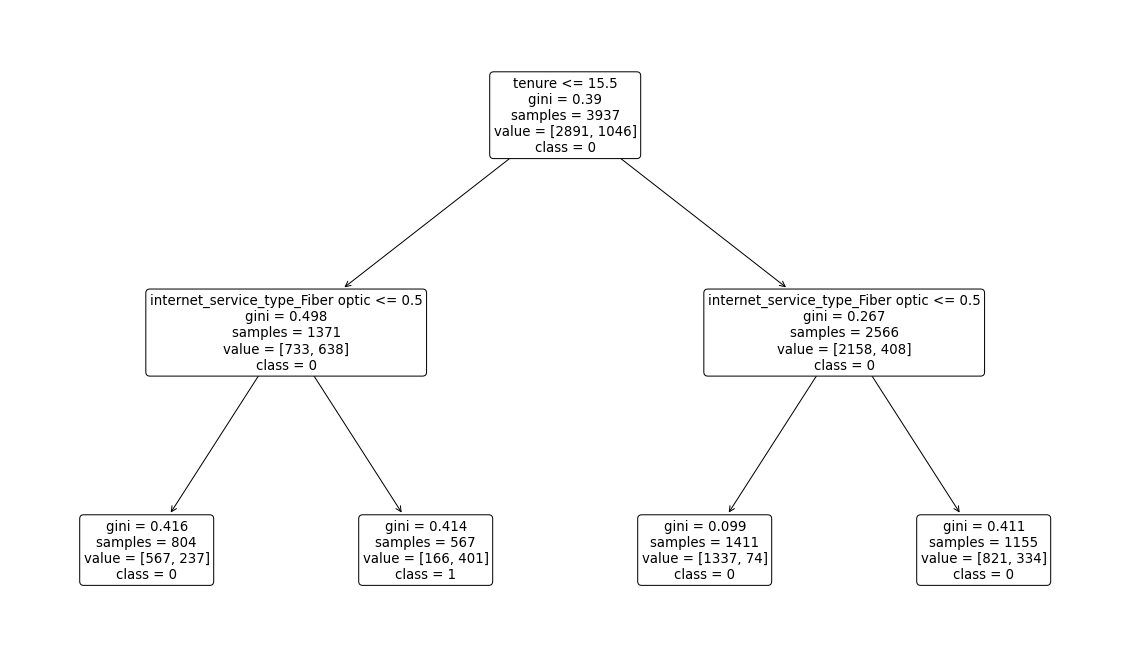

In [54]:
clf = DecisionTreeClassifier(max_depth=2, random_state=123)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [55]:
y_pred = clf.predict(X_train)
y_pred[0:5]
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [56]:
confusion_matrix(y_train, y_pred)

array([[2725,  166],
       [ 645,  401]])

In [57]:
y_train.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [58]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2725,166
1,645,401


In [59]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.38      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



# Lather, Rinse, Repeat

[Text(558.0, 489.24, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(279.0, 163.08000000000004, 'gini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(837.0, 163.08000000000004, 'gini = 0.267\nsamples = 2566\nvalue = [2158, 408]\nclass = 0')]

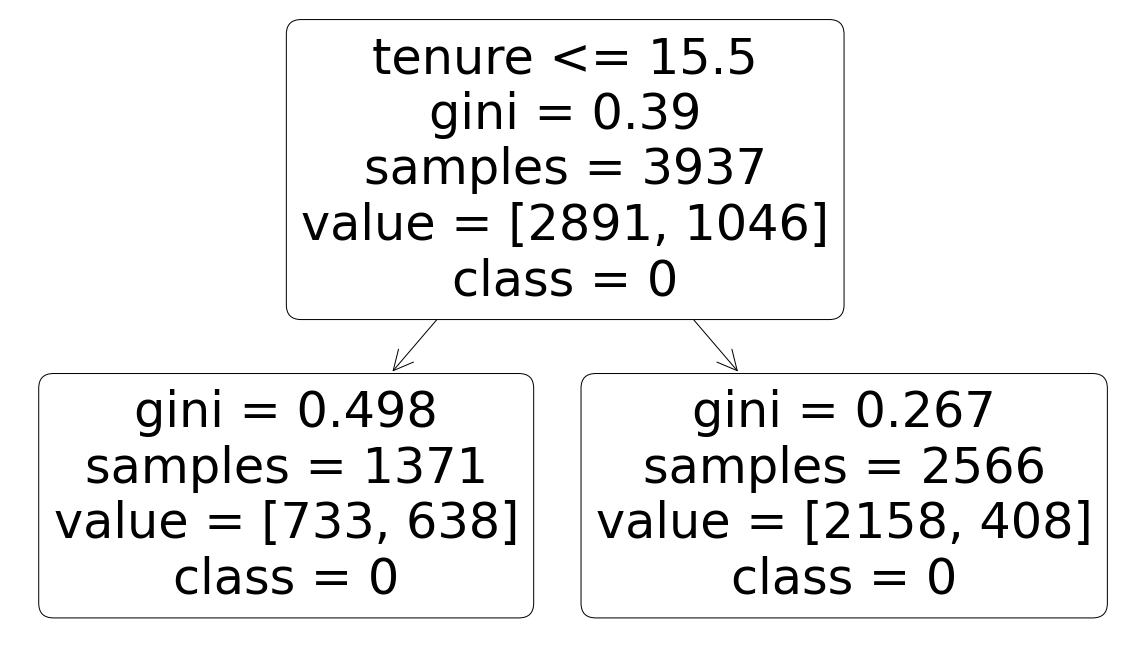

In [60]:
clf = DecisionTreeClassifier(max_depth=1, random_state=123)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [61]:
y_pred = clf.predict(X_train)
y_pred[0:5]
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.73


In [62]:
confusion_matrix(y_train, y_pred)

array([[2891,    0],
       [1046,    0]])

In [63]:
y_train.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [64]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2891,0
1,1046,0


In [65]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2891
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937



# Lather, Rinse, Repeat

[Text(560.6359011627907, 611.5500000000001, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(279.40552325581393, 530.01, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(141.9331395348837, 448.47, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = 0'),
 Text(79.48255813953489, 366.93, 'internet_service_type_None <= 0.5\ngini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = 0'),
 Text(48.66279069767442, 285.39000000000004, 'monthly_charges <= 60.475\ngini = 0.495\nsamples = 203\nvalue = [91, 112]\nclass = 1'),
 Text(25.953488372093023, 203.85000000000002, 'paperless_billing_encoded <= 0.5\ngini = 0.485\nsamples = 184\nvalue = [76, 108]\nclass = 1'),
 Text(12.976744186046512, 122.31000000000006, 'total_charges <= 24.725\ngini = 0.5\nsamples = 86\nvalue = [44, 42]\nclass = 0'),
 Text(6.488372093023256, 40.76999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\ncl

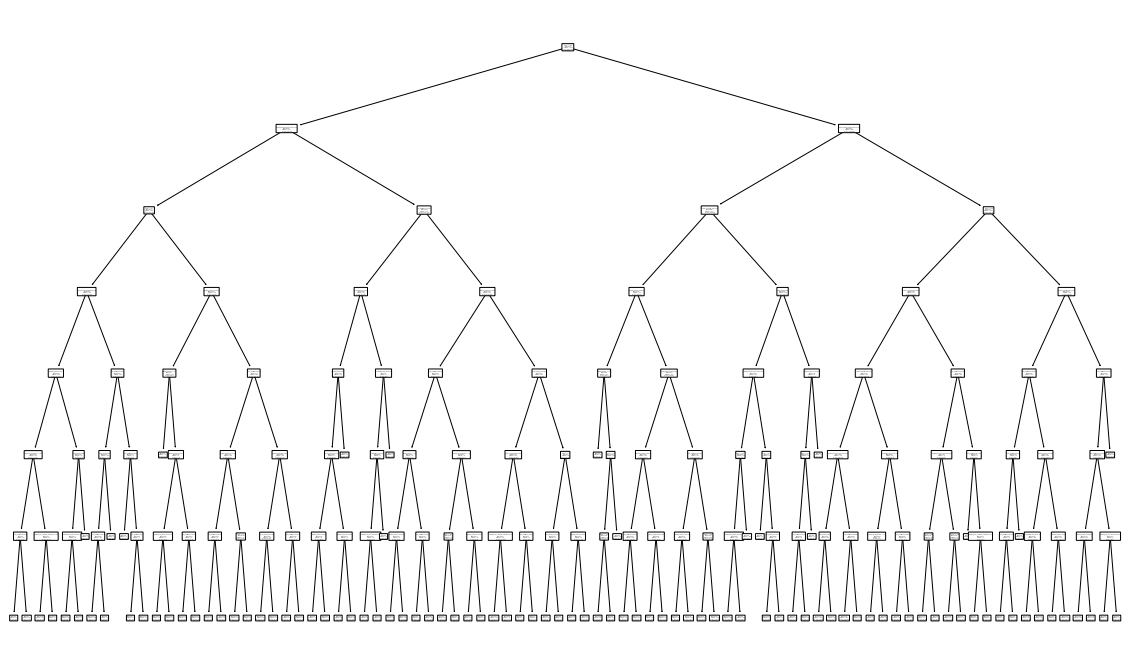

In [66]:
clf = DecisionTreeClassifier(max_depth=7, random_state=123)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [67]:
y_pred = clf.predict(X_train)
y_pred[0:5]
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [68]:
confusion_matrix(y_train, y_pred)
y_train.value_counts()
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2578,313
1,349,697


In [69]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2891
           1       0.69      0.67      0.68      1046

    accuracy                           0.83      3937
   macro avg       0.79      0.78      0.78      3937
weighted avg       0.83      0.83      0.83      3937



# Questions

How do you know when a model is overfitted or underfitted? 

Why aren't decision trees used in the exploratory process? 

When you have a decision tree with considerable branches, what is the easiest way to read it? 

# Random Forest - Telco

### Train Model 

Create the object 

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

Fit the model 

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

Feature Importance

In [73]:
print(rf.feature_importances_)

[4.37448284e-03 2.01664878e-01 8.48587812e-02 1.19757935e-01
 9.48877313e-05 3.48510659e-03 2.90054625e-03 9.47663424e-04
 6.51668044e-03 4.41422396e-04 1.26612716e-04 3.42427626e-02
 2.08739446e-02 2.12318277e-02 8.25721848e-03 1.63935892e-02
 5.34174454e-03 4.61404428e-02 1.69019665e-02 2.23569501e-02
 1.63671046e-03 1.45120451e-02 1.10310774e-03 2.44821215e-02
 1.12284262e-01 1.32588184e-01 1.21888612e-02 5.95301874e-04
 8.31490957e-02 5.50867497e-04]


In [74]:
## Feature importance in descending order
X_train.columns[rf.feature_importances_.argsort()[::-1]]

Index(['tenure', 'internet_service_type_Fiber optic', 'total_charges',
       'contract_type_Two year', 'monthly_charges',
       'payment_type_Electronic check', 'tech_support_No internet service',
       'online_security_No internet service', 'contract_type_One year',
       'streaming_tv_No internet service', 'online_backup_No internet service',
       'online_security_Yes', 'tech_support_Yes',
       'device_protection_No internet service',
       'streaming_movies_No internet service', 'internet_service_type_None',
       'online_backup_Yes', 'paperless_billing_encoded',
       'device_protection_Yes', 'senior_citizen', 'partner_encoded',
       'dependents_encoded', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'phone_service_encoded', 'payment_type_Credit card (automatic)',
       'payment_type_Mailed check', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'gender_encoded'],
      dtype='object')

Make Predictions

In [75]:
y_pred = rf.predict(X_train)

Estimate Probability

In [76]:
y_pred_proba = rf.predict_proba(X_train)

Compute the Accuracy

In [77]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [78]:
print(confusion_matrix(y_train, y_pred))
y_train.value_counts()
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

[[2780  111]
 [ 718  328]]


,0,1
0,2780,111
1,718,328


In [79]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2891
           1       0.75      0.31      0.44      1046

    accuracy                           0.79      3937
   macro avg       0.77      0.64      0.66      3937
weighted avg       0.78      0.79      0.76      3937



### Validate the Model 

In [80]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.77


# Random Forest Titanic

In [81]:
df = acquire.get_titanic_data()
df.head(3)

Using cached csv


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [82]:
titanic_df = prepare.prep_titanic_data(df)

In [83]:
train, validate, test = titanic_df

In [84]:
X_train = train.drop(columns=['survived'])
y_train = train.survived 

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [85]:
cols_to_drop = ['sex', 'embark_town']
X_train = X_train.drop(columns=cols_to_drop)

In [86]:

cols_to_drop = ['sex', 'embark_town']
X_validate = X_validate.drop(columns=cols_to_drop)

In [87]:
X_train.head(3)

,passenger_id,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,1,36.0,0,0,40.1250,1,1,0,0
165,165,3,9.0,0,2,20.5250,0,1,0,1
50,50,3,7.0,4,1,39.6875,0,1,0,1


In [105]:
#Create the object 
af = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [106]:
af.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [107]:
#feature importance
print(af.feature_importances_)

[0.16359522 0.08740554 0.15093152 0.04708349 0.02672832 0.18238905
 0.01822827 0.28960813 0.01169783 0.02233262]


In [108]:
X_train.columns[af.feature_importances_.argsort()[::-1]]

Index(['sex_male', 'fare', 'passenger_id', 'age', 'pclass', 'sibsp', 'parch',
       'embark_town_Southampton', 'alone', 'embark_town_Queenstown'],
      dtype='object')

Make Predictions 

In [109]:
y_pred = af.predict(X_train)

Estimate Probability

In [110]:
y_pred_proba = af.predict_proba(X_train)

Compute Accuracy

Model Score 

In [111]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(af.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.98


Confusion Matrix 

In [112]:
print(confusion_matrix(y_train, y_pred))
y_train.value_counts()
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

[[307   0]
 [ 11 180]]


,0,1
0,307,0
1,11,180


Classification Report

In [113]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       307
           1       1.00      0.94      0.97       191

    accuracy                           0.98       498
   macro avg       0.98      0.97      0.98       498
weighted avg       0.98      0.98      0.98       498



Validate the Model

In [114]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(af.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.80


Metrics: 
- Accuracy: 0.80 
- True Positive Rate: 307/498 
- False Positive Rate: 0/498
- True Negative Rate: 180/498
- False Negative Rate: 11/498 
- Precision: {0: 0.97, 1: 1.00} 
- Recall {0: 1.00, 1: 0.94} 
- f1-score {0: 0.98, 1: 0.97} 
- support {0: 307, 1: 191}

### Random Forest Titanic: Lather, Rinse, Repeat

Run through steps increasing your min_samples_leaf and decreasing your max_depth

Create the Object 

In [120]:
zf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

Fit your data

In [121]:
zf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=123)

Examine Feature Importance 

In [122]:
X_train.columns[zf.feature_importances_.argsort()[::-1]]

Index(['sex_male', 'fare', 'pclass', 'passenger_id', 'age', 'sibsp', 'alone',
       'embark_town_Southampton', 'parch', 'embark_town_Queenstown'],
      dtype='object')

Make Predictions 

In [123]:
y_pred = zf.predict(X_train)

Estimate Probability 

In [124]:
y_pred_proba = zf.predict_proba(X_train)

Compute Accuracy 

In [125]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(zf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.85


Confusion Matrix

In [126]:
print(confusion_matrix(y_train, y_pred))
y_train.value_counts()
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

[[291  16]
 [ 59 132]]


,0,1
0,291,16
1,59,132


Classification Report

In [127]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       307
           1       0.89      0.69      0.78       191

    accuracy                           0.85       498
   macro avg       0.86      0.82      0.83       498
weighted avg       0.85      0.85      0.84       498



Validate Model

In [128]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(zf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


Metrics: 
- Accuracy: 0.79
- True Positive Rate: 291/498 
- False Positive Rate: 16/498
- True Negative Rate: 132/498
- False Negative Rate: 59/498 
- Precision: {0: 0.83, 1: 0.89} 
- Recall {0: 0.95, 1: 0.69} 
- f1-score {0: 0.89, 1: 0.78} 
- support {0: 307, 1: 191}

Random Forest Titanic: Lather, Rinse, Repeat

Run through steps increasing your min_samples_leaf and decreasing your max_depth. I did 3 for both metrics this round

In [131]:
pf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [132]:
pf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [133]:
X_train.columns[pf.feature_importances_.argsort()[::-1]]

Index(['sex_male', 'pclass', 'fare', 'passenger_id', 'age', 'sibsp', 'alone',
       'parch', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [134]:
y_pred = pf.predict(X_train)

In [135]:
y_pred_proba = pf.predict_proba(X_train)

In [136]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(pf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.83


In [137]:
print(confusion_matrix(y_train, y_pred))
y_train.value_counts()
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

[[285  22]
 [ 63 128]]


,0,1
0,285,22
1,63,128


In [138]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       307
           1       0.85      0.67      0.75       191

    accuracy                           0.83       498
   macro avg       0.84      0.80      0.81       498
weighted avg       0.83      0.83      0.82       498



In [139]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(pf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


Metrics: 
- Accuracy: 0.79
- True Positive Rate: 285/498 
- False Positive Rate: 22/498
- True Negative Rate: 128/498
- False Negative Rate: 63/498 
- Precision: {0: 0.82, 1: 0.85} 
- Recall {0: 0.93, 1: 0.67} 
- f1-score {0: 0.87, 1: 0.75} 
- support {0: 307, 1: 191}

What conclusions can we draw concerning the min_samples_leaf, and max_depth of random forest. What are our clues that our data is either overfit or underfit? 

Answer written here 

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why? 

The min_leaf 1 with the max_depth 10 performed the best both in the in-sample data and out-of-sample data. 

# K-Nearest Neighbor

In [144]:
from sklearn.neighbors import KNeighborsClassifier

Create the Object 

In [145]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

Fit the Model 

In [146]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Make Predictions

In [147]:
y_pred = knn.predict(X_train)

Estimate Probability 

In [148]:
y_pred_proba = knn.predict_proba(X_train)

Compute the Accuracy 

In [149]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


Create a Confusion Matrix 

In [150]:
print(confusion_matrix(y_train, y_pred))

[[266  41]
 [ 87 104]]


Create a classification report 

In [151]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       307
           1       0.72      0.54      0.62       191

    accuracy                           0.74       498
   macro avg       0.74      0.71      0.71       498
weighted avg       0.74      0.74      0.73       498



In [152]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.61


Metrics: 
- Accuracy: 0.61
- True Positive Rate: 266/498 
- False Positive Rate: 41/498
- True Negative Rate: 104/498
- False Negative Rate: 87/498 
- Precision: {0: 0.75, 1: 0.72} 
- Recall {0: 0.87, 1: 0.54} 
- f1-score {0: 0.81, 1: 0.62} 
- support {0: 307, 1: 191}

### K-Nearest Neighbor increase k to 10 

In [155]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [156]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [157]:
y_pred = knn.predict(X_train)

In [158]:
y_pred_proba = knn.predict_proba(X_train)

In [159]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.70


In [160]:
print(confusion_matrix(y_train, y_pred))

[[284  23]
 [128  63]]


In [161]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       307
           1       0.73      0.33      0.45       191

    accuracy                           0.70       498
   macro avg       0.71      0.63      0.62       498
weighted avg       0.71      0.70      0.66       498



In [162]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.62


Metrics: 
- Accuracy: 0.62
- True Positive Rate: 284/498 
- False Positive Rate: 23/498
- True Negative Rate: 63/498
- False Negative Rate: 128/498 
- Precision: {0: 0.69, 1: 0.73} 
- Recall {0: 0.93, 1: 0.33} 
- f1-score {0: 0.79, 1: 0.45} 
- support {0: 307, 1: 191}

When the K was increased to ten, there was a significant jump in the amount of false negatives the model produced 

### K-Nearest Neighbor increase k to 20

In [164]:
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [165]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [166]:
y_pred = knn.predict(X_train)

In [167]:
y_pred_proba = knn.predict_proba(X_train)

In [168]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.67


In [169]:
print(confusion_matrix(y_train, y_pred))

[[288  19]
 [147  44]]


In [170]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       307
           1       0.70      0.23      0.35       191

    accuracy                           0.67       498
   macro avg       0.68      0.58      0.56       498
weighted avg       0.68      0.67      0.61       498



In [171]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.65


Metrics: 
- Accuracy: 0.65
- True Positive Rate: 288/498 
- False Positive Rate: 19/498
- True Negative Rate: 44/498
- False Negative Rate: 147/498 
- Precision: {0: 0.66, 1: 0.70} 
- Recall {0: 0.94, 1: 0.23} 
- f1-score {0: 0.78, 1: 0.35} 
- support {0: 307, 1: 191}

The accuracy increased from 10 to 20, but the number of false negatives also increased! 

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Which model performs best on our out-of-sample data from validate?

### Logistic Regression

"Useful for understanding the influence of several independent variables on a single outcome variable."

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

# we will have 2 different target variables 
dummies = pd.get_dummies(df['species'], drop_first=True)

df = pd.concat([df, dummies], axis=1).drop(columns=['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
1,5.1,3.5,1.4,0.2,0,0
2,4.9,3.0,1.4,0.2,0,0
3,4.7,3.2,1.3,0.2,0,0
4,4.6,3.1,1.5,0.2,0,0
5,5.0,3.6,1.4,0.2,0,0


Next Steps: 
- train/validate/test split: 

In [2]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

Next Steps: 
- Predict Versicolor 
- do exploration and train our model on train data 
- tune our model on validate

In [3]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='versicolor', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['versicolor','virginica'])
y_train = train.versicolor

X_validate = validate.drop(columns=['versicolor','virginica'])
y_validate = validate.versicolor

X_test = test.drop(columns=['versicolor','virginica'])
y_test = test.versicolor

In [13]:
X_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
97,5.7,2.9,4.2,1.3
125,6.7,3.3,5.7,2.1
87,6.7,3.1,4.7,1.5


### Model 1: Set solver to ibfgs

Create the object 

In [4]:
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')


Fit the Model 

In [5]:
logit.fit(X_train, y_train)


LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

Feature Importance

In [7]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.45745489 -4.33000304  2.00440881 -2.79033335]]
Intercept: 
 [14.54733857]


Make Predictions

In [8]:
y_pred = logit.predict(X_train)

Estimate Probability

In [9]:
y_pred_proba = logit.predict_proba(X_train)

### Evaluate Model

Compute the Accuracy

In [10]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.55


Create a Confusion Matrix 

In [11]:
print(confusion_matrix(y_train, y_pred))

[[18 38]
 [ 0 28]]


Create a classification report 

In [12]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.32      0.49        56
           1       0.42      1.00      0.60        28

    accuracy                           0.55        84
   macro avg       0.71      0.66      0.54        84
weighted avg       0.81      0.55      0.52        84



In [ ]:
Metrics: 
- Precision 

### Model 2

We can create new models by changing features we feed the algorithm, hyperparameters, and/or the alogrithm itself. For this second model, we will adjust our hyperparameter, C.

Create the object

In [14]:
logit2 = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')


Fit the Model 

In [15]:
logit2.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

Feature Importance

In [16]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-0.20880009 -1.67727952  1.00954681 -0.25663236]]
Intercept: 
 [6.02992374]


Make Predictions

In [17]:
y_pred2 = logit2.predict(X_train)

Estimate Probability

In [18]:
y_pred_proba2 = logit2.predict_proba(X_train)

Evaluate Model

Compute the Accuracy

In [19]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.40


Create a Confusion Matrix

In [20]:
print(confusion_matrix(y_train, y_pred2))

[[ 6 50]
 [ 0 28]]


Create a classification report

In [21]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.11      0.19        56
           1       0.36      1.00      0.53        28

    accuracy                           0.40        84
   macro avg       0.68      0.55      0.36        84
weighted avg       0.79      0.40      0.31        84

